In [1]:
# !pip install prophet

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
import Handlers as hd

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
df = pd.read_csv('../data/point_M634_ts.csv', index_col=0, parse_dates=True)

In [4]:
df['ds'] = df.index

In [5]:
df_prophet = df.rename(columns={'num_of_buyers': 'y'})

In [6]:
predict_horizon = 30

train = df_prophet.iloc[:-predict_horizon, :]
test = df_prophet.iloc[-predict_horizon:, :]

In [7]:
model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=predict_horizon)
forecast = model.predict(future)

y_pred = forecast['yhat'][-30:].values
y_true = test['y'].values

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)

14:58:53 - cmdstanpy - INFO - Chain [1] start processing
14:58:54 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 0.3051775317712801


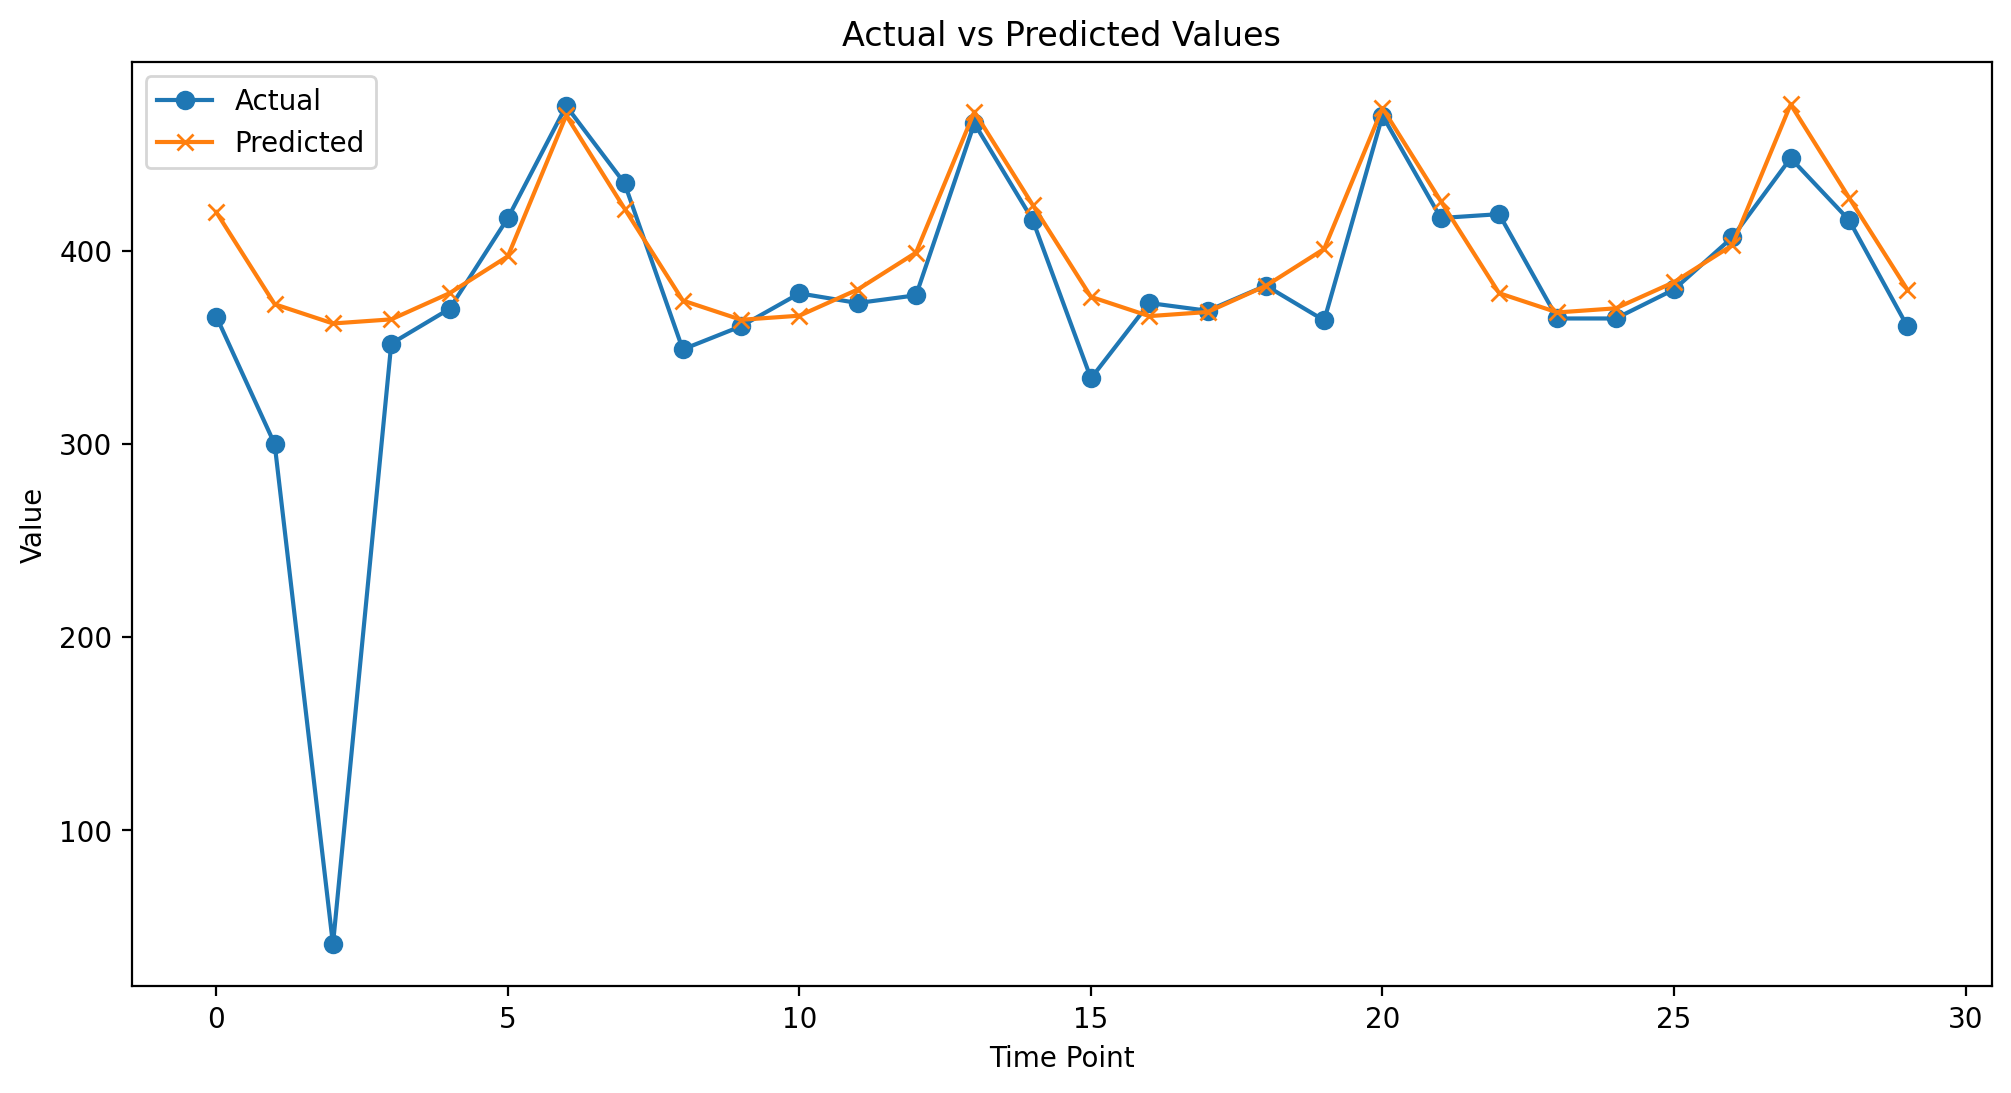

In [15]:
time_points = range(len(y_true))

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Time Point')
plt.ylabel('Value')

plt.legend()
plt.show()